# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurul Fadillah
- **Email:** nurulfadillah1521@gmail.com
- **ID Dicoding:** nrifdiih

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana Demografi pelanggan yang dimiliki?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Pada tahapan ini akan melakukan import dataset yang relevan dan berguna dalam tahapan analisis data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset yang di-import adalah dataset yang paling relevan dan dapat membantu menjawab pertanyaan bisnis

### Assessing Data

#### Menilai tabel "customers_df"

In [6]:
customers_df.info()
customers_df.isna().sum() 
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe(include="all")
customers_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

**Insight:**
- dari method .info() diperoleh fakta bahwa tidak ada missing value dari setiap kolom. hal ini dikonfirmasi dari method .isna().sum() yang menghasilkan nilai 0
- tidak ada duplicates
- dari hasil penggunaan metode .describe(), tidak ada keanehan. hanya saja, program menghitung parameter statistik dari kolom "code_prefix" yang mana seharusnya tidak perlu karena code_prefix
- 96096 unique value pada customer_unique_id menunjukkan bahwa terdapat 96096 customer yang terdata
- tipe data customer_zip_code_prefix seharusnya object bukan integer karena tidak diperuntukkan untuk operasi matematika

#### Menilai tabel "products_df"

In [7]:
products_df.info()
products_df.isna().sum() 
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe(include="all")
products_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

**Insight:**
- terdapat duplicates pada kolom "product_category_name", "product_name_length", "pruduct_description_length", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", dan "prudct_photos_qty". Tapi, duplikat pada kolom ini tidak perlu dihapus karena sangat memungkinkan suatu produk memiliki length nama yang sama, description length yang sama, jumlah foto yang di-display sama, memiliki berat, panjang, lebar, dan tinggi yang sama, dan berada di kategori yang sama
- kolom yang tidak boleh ada duplicates adalah product_id dan terbukti bahwa kolom tersebut tidak ada duplicates maka dataset products_df sudah aman
- terdapat missing value pada product_category_name, product_name_length, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_widht_cm

#### Menilai tabel "order_items_df"

In [8]:
order_items_df.info()
order_items_df.isna().sum() 
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe(include="all")
order_items_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

**Insight:**
- tidak ada missing value
- tidak ada duplicates
- kolom "order_item_id" menunjukkan banyaknya barang yang di-order dalam suatu order id. kolom ini memiliki nilai minimum 1 dan maksimum 21 yang artinya, dalam suatu order yang sama, produk yang di-checkout dalam satu order berada di rentang satu produk sampa dengan 21 produk sekaligus
- order_id = 98666 berarti ada 98666 orderan yang masuk ke sistem
- tipe data shipping_limit_date seharusnya bukan object tetapi datetime

### Cleaning Data

#### Membersihkan tabel customers_df

mengganti tipe data customer_zip_code_prefix dari integer ke object

In [9]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype('object')

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


#### Membersihkan tabel products_df

drop produk yang kategorinya kosong. keputusan ini diambil karena jumlah data yang mengandung missing value sangat insignifikan terhadpa total jumlah seluruh data, yakni hanya 610. jadi, tidak masalah jika langsung di drop untuk menghemat waktu

In [10]:
products_df.dropna(inplace=True)

#### Membersihkan tabel order_items_df

In [11]:
#mengubah tipe data ke datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore customers_df

Akan dilakukan eksplorasi terhadap tabel customers_df yang berfokus pada kota dan negara bagian asal dari para customer untuk mengetahui demografi customer pada aspek daerah

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [24]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False) #urutkan dari yang paling besar ke kecil

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [26]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False) #urutkan dari yang paling besar ke kecil

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- Top 5 Kota dengan Pelanggan Terbanyak:
  1. Sao Paulo
  2. Rio de Janeiro
  3. Belo Horizonte
  4. Brasilia
  5. Curitibia
- Top 5 Negara Bagian dengan Pelanggan Terbanyak:
  1. SP
  2. RJ
  3. MG
  4. RS
  5. PR

### Explore products_df & order_items_df

Akan dilakukan eksplorasi pada dataset products_df dan order_items_df

Terjadi dua penggabungan tabel pada tahapan ini

1. penggabungan products_df dan order_items_df --> digunakan untuk mengeksplorasi frekuensi kemunculan produk
2. penggabungan hasil gabungan products_df dan order_items_df dengan product_category_name_translation_df --> digunakan untuk melihat nama kategori dalam versi terjemahan Bahasa Inggrisnya karena original nya ditulis dalam Bahasa Portugis

In [14]:
productes_orderitems_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
productes_orderitems_df.head()

#drop kolom yang tidak dibutuhkan
productes_orderitems_df = productes_orderitems_df.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

In [15]:
productes_orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


In [16]:
#gabungkan lagi dengan terjemahannya
productes_orderitems_translated_df = pd.merge(
    left=productes_orderitems_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
productes_orderitems_translated_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


In [17]:
top_5_products = productes_orderitems_translated_df ['product_category_name_english'].value_counts().nlargest(5)
top_5_products

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
Name: count, dtype: int64

In [18]:
product_sales = productes_orderitems_translated_df['product_category_name_english'].value_counts()
least_sold_products = product_sales.tail(5).tail(5)
least_sold_products

product_category_name_english
arts_and_craftmanship        24
cds_dvds_musicals            14
la_cuisine                   14
fashion_childrens_clothes     8
security_and_services         2
Name: count, dtype: int64

**Insight:**
- Top 5 produk kategori terlaris
  1. bed_bath_table
  2. healthy_beauty
  3. sports_leisure
  4. furniture_decor
  5. computers_accessories
- 5 kategori produk terbawah (paling tidak laris)
  1. Security and Services
  2. Fashion Childrens Clothes
  3. La Cuisine
  4. CDS, DVSDS, Musicals
  5. Arts and craftmanship

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?

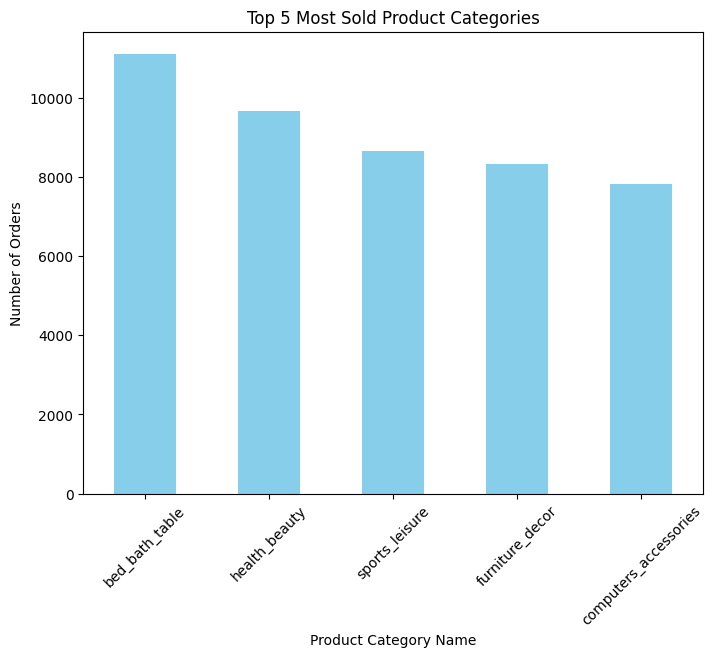

In [19]:
#mencari tahu top 5 kategori produk terlaris
top_5_products = productes_orderitems_translated_df ['product_category_name_english'].value_counts().nlargest(5)
plt.figure(figsize=(8, 6))
top_5_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Sold Product Categories')
plt.xlabel('Product Category Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

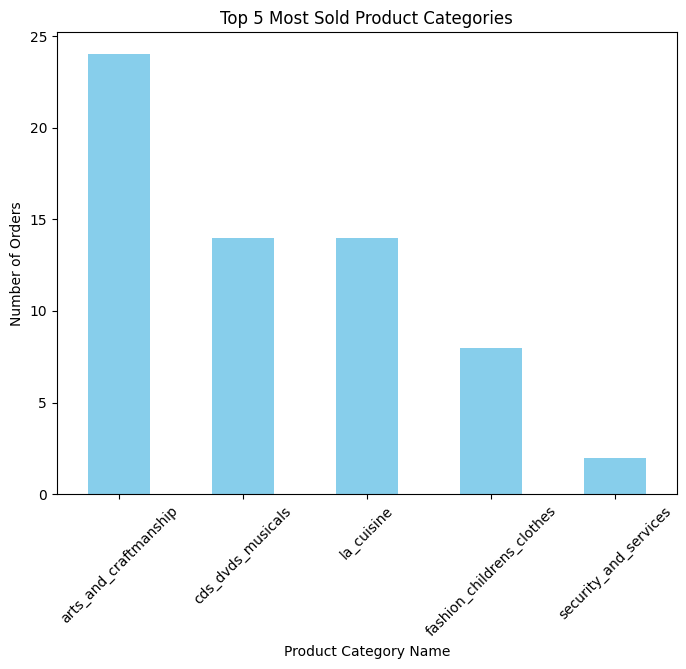

In [20]:
#mencari tahu top 5 kategori produk paling tidak laris
product_sales = productes_orderitems_translated_df['product_category_name_english'].value_counts()
least_sold_products = product_sales.tail(5).tail(5)
plt.figure(figsize=(8, 6))
least_sold_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Sold Product Categories')
plt.xlabel('Product Category Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Top 5 produk kategori terlaris
  1. bed_bath_table
  2. healthy_beauty
  3. sports_leisure
  4. furniture_decor
  5. computers_accessories
- 5 kategori produk terbawah (paling tidak laris)
  1. Security and Services
  2. Fashion Childrens Clothes
  3. La Cuisine
  4. CDS, DVSDS, Musicals
  5. Arts and craftmanship

### Pertanyaan 2: Bagaimana Demografi pelanggan yang dimiliki?

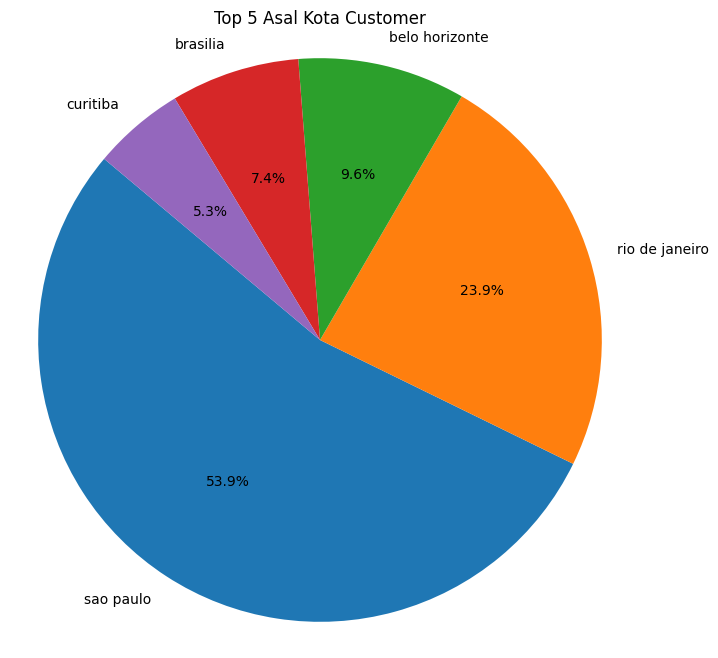

In [21]:
city_counts = customers_df['customer_city'].value_counts()
top_5_cities = city_counts.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5_cities, labels=top_5_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Asal Kota Customer')
plt.axis('equal')  
plt.show()

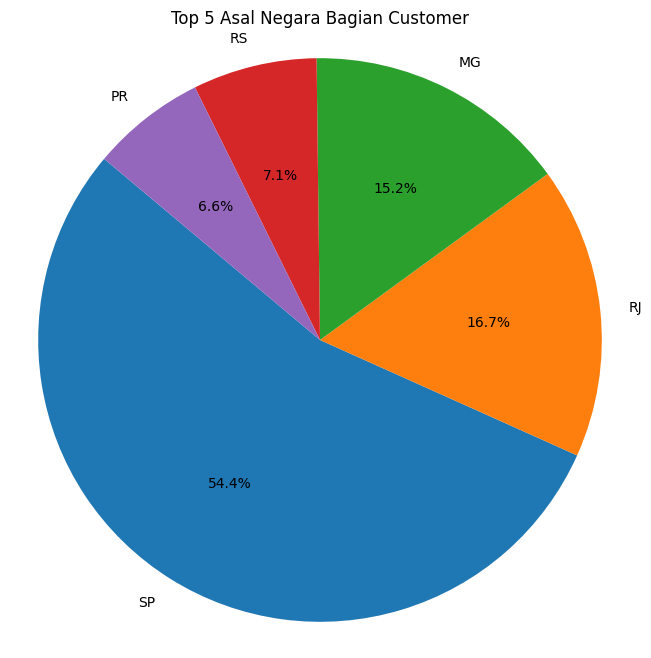

In [22]:
city_counts = customers_df['customer_state'].value_counts()
top_5_cities = city_counts.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5_cities, labels=top_5_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Asal Negara Bagian Customer')
plt.axis('equal')  
plt.show()

**Insight:**
- Top 5 Kota dengan Pelanggan Terbanyak:
  1. Sao Paulo
  2. Rio de Janeiro
  3. Belo Horizonte
  4. Brasilia
  5. Curitibia
- Top 5 Negara Bagian dengan Pelanggan Terbanyak:
  1. SP
  2. RJ
  3. MG
  4. RS
  5. PR

## Conclusion

- Conclution pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?

Di urutan teratas, kategori bed_bath_table menunjukkan permintaan yang signifikan, diikuti oleh kategori healthy_beauty yang semakin populer di kalangan konsumen yang peduli akan kesehatan dan kecantikan. Kategori sports_leisure juga mencuri perhatian, mencerminkan tren gaya hidup aktif di masyarakat saat ini. Selain itu, furniture_decor dan computers_accessories masing-masing menempati posisi keempat dan kelima, menandakan bahwa baik perabot rumah tangga maupun aksesori teknologi tetap menjadi pilihan utama di kalangan pembeli.

Namun, situasinya berbeda untuk lima kategori produk dengan penjualan terendah. Kategori Security and Services mencatatkan penjualan yang minim, diikuti oleh Fashion Childrens Clothes, yang mungkin disebabkan oleh kurangnya perhatian terhadap fashion anak-anak di pasar saat ini. Kategori La Cuisine dan CDs, DVDs, Musicals juga menunjukkan hasil yang kurang memuaskan, menggambarkan pergeseran minat konsumen menuju solusi memasak yang lebih modern dan platform digital untuk hiburan. Terakhir, Arts and Craftmanship terjebak di bagian terbawah daftar, mungkin mencerminkan tantangan dalam memasarkan produk-produk kerajinan yang unik di tengah persaingan yang ketat.

Analisis ini memberikan wawasan yang berharga bagi pengelola produk dan pemasar untuk lebih memahami preferensi konsumen, serta untuk merumuskan strategi pemasaran yang lebih efektif untuk meningkatkan penjualan di kategori yang kurang laku.

- Conclution pertanyaan 2 : Bagaimana Demografi pelanggan yang dimiliki?

Analisis demografi pelanggan memberikan gambaran yang jelas tentang konsentrasi pelanggan di berbagai wilayah. Dalam hal kota, lima kota dengan jumlah pelanggan terbanyak adalah Sao Paulo, Rio de Janeiro, Belo Horizonte, Brasilia, dan Curitiba. Sao Paulo muncul sebagai kota teratas dengan basis pelanggan yang sangat besar, mencerminkan kepadatan populasi dan aktivitas ekonomi yang tinggi di wilayah tersebut. Diikuti oleh Rio de Janeiro, yang dikenal dengan atraksi pariwisata dan budaya yang kaya, serta Belo Horizonte, yang menjadi pusat pertumbuhan ekonomi di negara bagian Minas Gerais. Brasilia, sebagai ibu kota Brasil, juga mencatatkan jumlah pelanggan yang signifikan, sedangkan Curitiba menonjol berkat inovasi dan perencanaan kota yang baik.

Selain itu, analisis berdasarkan negara bagian menunjukkan bahwa SP (São Paulo) merupakan negara bagian dengan pelanggan terbanyak, diikuti oleh RJ (Rio de Janeiro), MG (Minas Gerais), RS (Rio Grande do Sul), dan PR (Paraná). Dominasi negara bagian SP dalam hal jumlah pelanggan menunjukkan pentingnya wilayah ini sebagai pusat ekonomi dan komersial di Brasil. Hal ini juga mencerminkan potensi pasar yang besar, terutama bagi bisnis yang ingin memperluas jangkauan mereka. Dengan pemahaman mendalam tentang demografi pelanggan, perusahaan dapat mengembangkan strategi pemasaran yang lebih tepat sasaran dan meningkatkan efektivitas kampanye untuk menarik dan mempertahankan pelanggan di wilayah-wilayah tersebut.

In [23]:
pip freeze requirements.txt

altair==5.4.1
anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.1.0
blinker==1.8.2
cachetools==5.5.0
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.8
executing==2.1.0
fastjsonschema==2.20.0
filelock==3.16.1
fonttools==4.54.1
fqdn==1.5.1
gitdb==4.0.11
GitPython==3.1.43
h11==0.14.0
httpcore==1.0.5
httpx==0.27.2
idna==3.10
ipykernel==6.29.5
ipython==8.27.0
ipythonblocks==1.9.1
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.14.2
jupyter_server_terminals==0.5.3
jupyterlab==4.2.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
kiwisolve